**Column Details:**
- **distance_to_solar_noon**: in radians.

- **temperature**: daily average temperature, in degrees Celsius.

- **wind_direction**: daily average wind direction, in degrees (0–360).

- **wind_speed**: daily average wind speed, in meters per second.

- **sky_cover**: on a five-step scale from 0 to 4, with 0 completely clear and 4 wholly covered.

- **visibility**: in kilometers.

- **humidity**: in percentage.

- **average_wind_speed**: average wind speed during the 3 hours the measure was taken, in meters per second.

- **average_pressure**: average barometric pressure during the 3 hours the measure was taken, in inches of mercury.

- **power_generated (Target)**: in Joules for each 3-hour period.



In [ ]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/solarpowergeneration.csv")
df.head()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


In [ ]:
df.shape

(2920, 10)

In [ ]:
df.columns

Index(['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed',
       'sky-cover', 'visibility', 'humidity', 'average-wind-speed-(period)',
       'average-pressure-(period)', 'power-generated'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.3 KB


* We have around 10 columns and every columns appears to be in their respected types.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
distance-to-solar-noon,2920.0,0.503294,0.298024,0.050401,0.243714,0.478957,0.739528,1.141361
temperature,2920.0,58.468493,6.841200,42.000000,53.000000,59.000000,63.000000,78.000000
wind-direction,2920.0,24.953425,6.915178,1.000000,25.000000,27.000000,29.000000,36.000000
wind-speed,2920.0,10.096986,4.838185,1.100000,6.600000,10.000000,13.100000,26.600000
sky-cover,2920.0,1.987671,1.411978,0.000000,1.000000,2.000000,3.000000,4.000000
visibility,2920.0,9.557705,1.383884,0.000000,10.000000,10.000000,10.000000,10.000000
humidity,2920.0,73.513699,15.077139,14.000000,65.000000,77.000000,84.000000,100.000000
average-wind-speed-(period),2919.0,10.129154,7.261547,0.000000,5.000000,9.000000,15.000000,40.000000
average-pressure-(period),2920.0,30.017760,0.142006,29.480000,29.920000,30.000000,30.110000,30.530000
power-generated,2920.0,6979.846233,10312.336413,0.000000,0.000000,404.000000,12723.500000,36580.000000


In [ ]:
#Let's check for any null values
df.isnull().sum()

,0
distance-to-solar-noon,0
temperature,0
wind-direction,0
wind-speed,0
sky-cover,0
visibility,0
humidity,0
average-wind-speed-(period),1
average-pressure-(period),0
power-generated,0


In [ ]:
# filling the null value with the column's mean value
mean_val = round(df['average-pressure-(period)'].mean(), 2)
df['average-wind-speed-(period)']=df['average-wind-speed-(period)'].fillna(mean_val)

#EDA

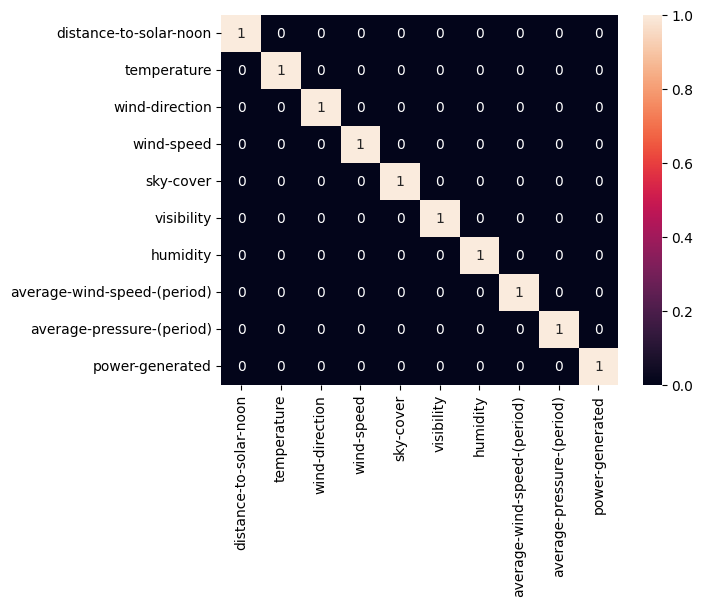

In [ ]:
# Let's find correlation of all the columns

sns.heatmap(df.corr()>0.7, annot=True, cbar=True)
plt.show()

* We can see none of the columns seems to be highly correlated.
* It's a good thing so we can retain all the columns.

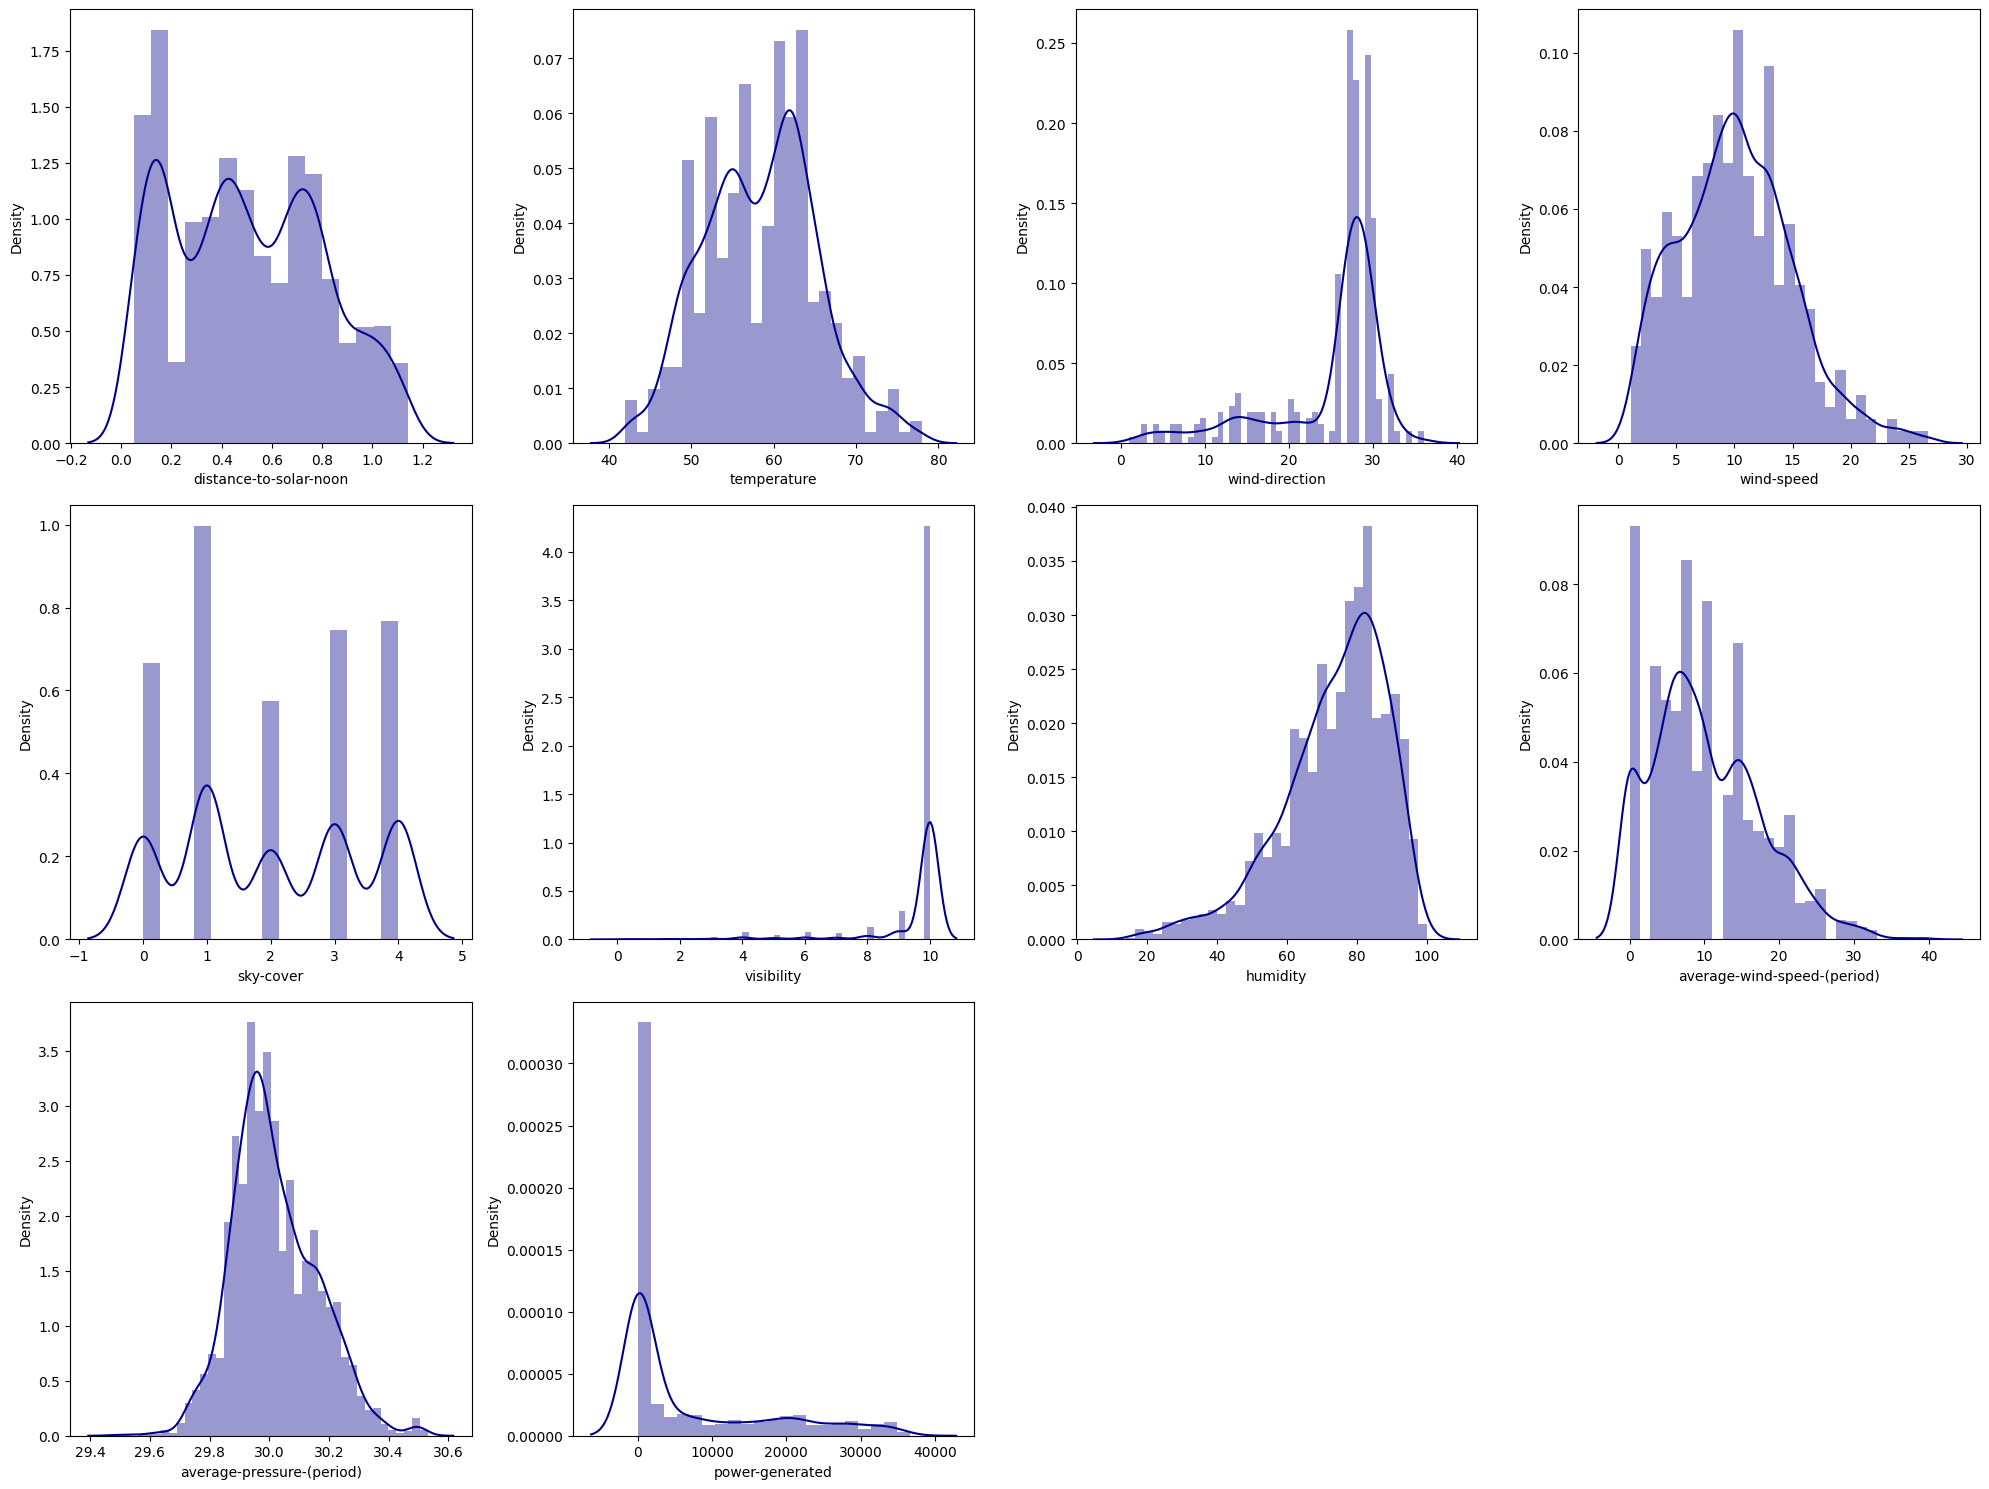

In [ ]:
# Let's understand the distribution of our data in each column
plt.figure(figsize=(20,15))
index = 0
for col in df.columns:
    index += 1
    plt.subplot(3, 4, index)
    sns.distplot(df[col], color='darkblue')
    plt.tight_layout()
plt.show()

* Most of the columns are normally distributed but seems to be heavily tailed.
* Column [distance-to-solar-noon] appears to be 3 tailed, suggesting most of the observations are taken on those times.
* Columns like [wind-direction, visibility, humidity] appears to be right skewed and right single tailed, suggesting presence of outliers.
* Columns like [temperature, wind-speed, average-wind-speed-(period), average-pressure-period), power-generated] appears to be left skewed.
* We can also observe that power-generated column has a lot of records at 0 meaning there are a lot of observations that do not generate power.

In [ ]:
# Let's try to understand how wind-direction effect power generation
# Line Plot of Power vs Distance to Solar Noon
import plotly.express as px

# Convert compass index (1–32) to degrees
df['wind-dir-deg'] = (df['wind-direction'] - 1) * 11.25

fig = px.scatter_polar(df,
                       r='power-generated',
                       theta='wind-dir-deg',
                       color='power-generated',
                       title='Polar Plot: Wind Direction vs Power')
fig.show()


* Apprantly wind direction does effect power-generation.
* We can observe most power is generated towards the end of the spectrum roughly translating to 28-32 range from the original range of wind-direction column.

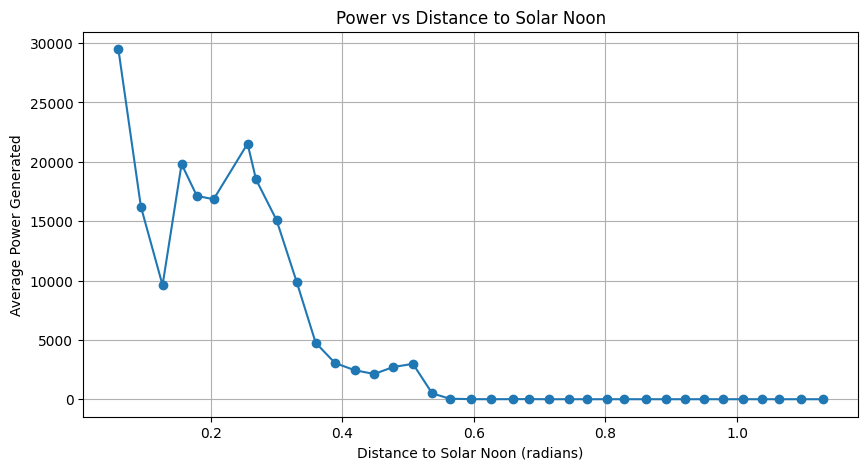

In [ ]:
# Bin values to smooth the curve
df['binned_dist'] = pd.cut(df['distance-to-solar-noon'], bins=37)

# Calculate average power per bin
avg_power = df.groupby('binned_dist')['power-generated'].mean()
bin_centers = df.groupby('binned_dist')['distance-to-solar-noon'].mean()

plt.figure(figsize=(10, 5))
plt.plot(bin_centers, avg_power, marker='o')
plt.xlabel("Distance to Solar Noon (radians)")
plt.ylabel("Average Power Generated")
plt.title("Power vs Distance to Solar Noon")
plt.grid(True)
plt.show()


* Average Power generated is higher around 0(represents the highest position of sun) and decreases as we go on.
* Also we can see there is hardly any power generation after 0.6 in average.
* Average power-generation is observed around [0 - 0.4] which roughly times around 9am to 3pm.

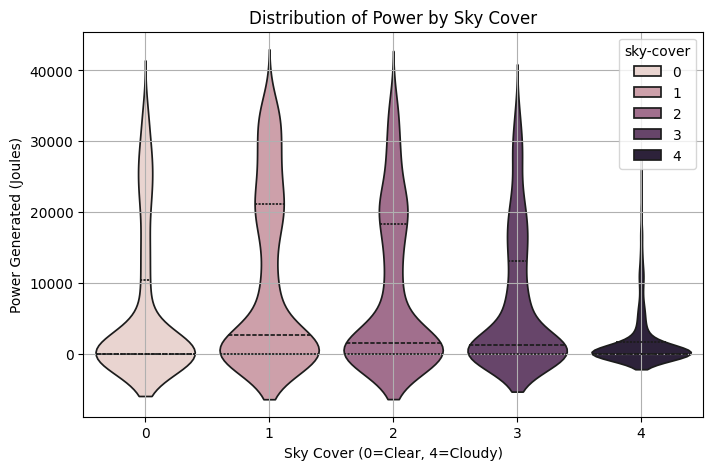

In [ ]:
plt.figure(figsize=(8,5))
sns.violinplot(x='sky-cover', y='power-generated', data=df, inner='quartile', hue='sky-cover')
plt.title("Distribution of Power by Sky Cover")
plt.xlabel("Sky Cover (0=Clear, 4=Cloudy)")
plt.ylabel("Power Generated (Joules)")
plt.grid(True)
plt.show()


From this violinplot we can infer that:
* When the sky is clear the power-generation is higher.
* When the sky is coludy there is less power-generation.

In [ ]:
# Needs model to work with
# import shap
# explainer = shap.Explainer(model)
# shap_values = explainer(df.drop('power-generated', axis=1))
# shap.summary_plot(shap_values, df.drop('power-generated', axis=1))

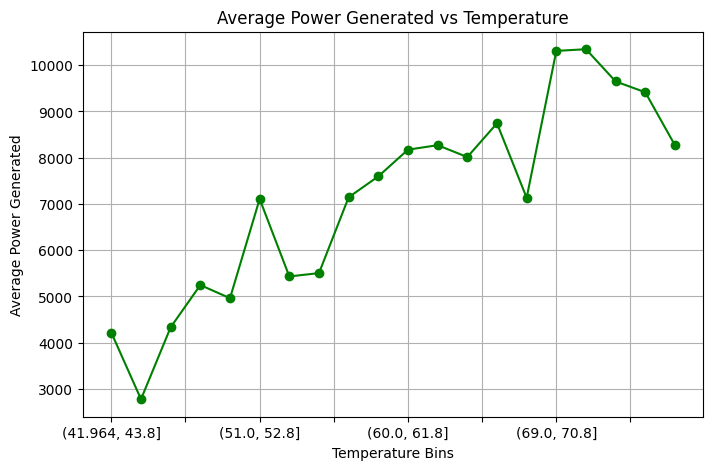

In [ ]:
# Let's check how temperature effects the power generation
df['temp_bin'] = pd.cut(df['temperature'], bins=20)
avg_temp = df.groupby('temp_bin')['power-generated'].mean()

avg_temp.plot(kind='line', marker='o', figsize=(8,5), color='green')
plt.title("Average Power Generated vs Temperature")
plt.xlabel("Temperature Bins")
plt.ylabel("Average Power Generated")
plt.grid(True)
plt.show()


Based on this line plot we can infer that:
* More the temperature higher is the average power generation.
* Lesses the temperature lower is the average power generation.
* Highest average power generation is observed around 70C.

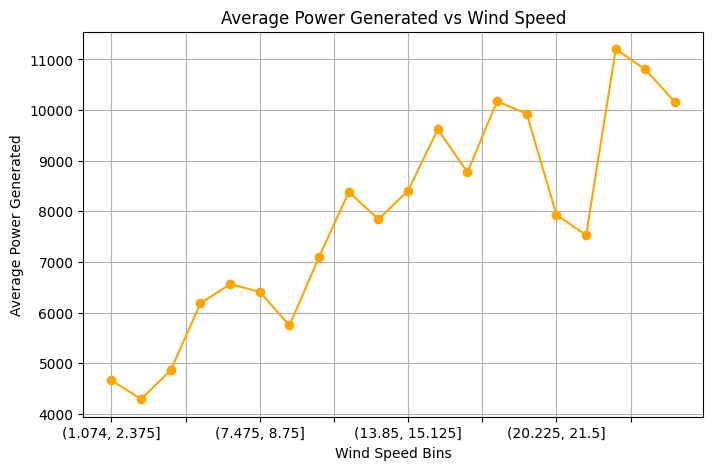

In [ ]:
# Let's understand how wind speed effects power generation
df['wind_bin'] = pd.cut(df['wind-speed'], bins=20)
avg_wind = df.groupby('wind_bin')['power-generated'].mean()

avg_wind.plot(kind='line', marker='o', color='orange', figsize=(8,5))
plt.title("Average Power Generated vs Wind Speed")
plt.xlabel("Wind Speed Bins")
plt.ylabel("Average Power Generated")
plt.grid(True)
plt.show()


* Here in this plot also we can observe an upward trend suggesting as the wind speed increases there is an increase in the power-generation.
* We can also observe a sudden drop towards wind-speed of around 20, probaly due to temperature.


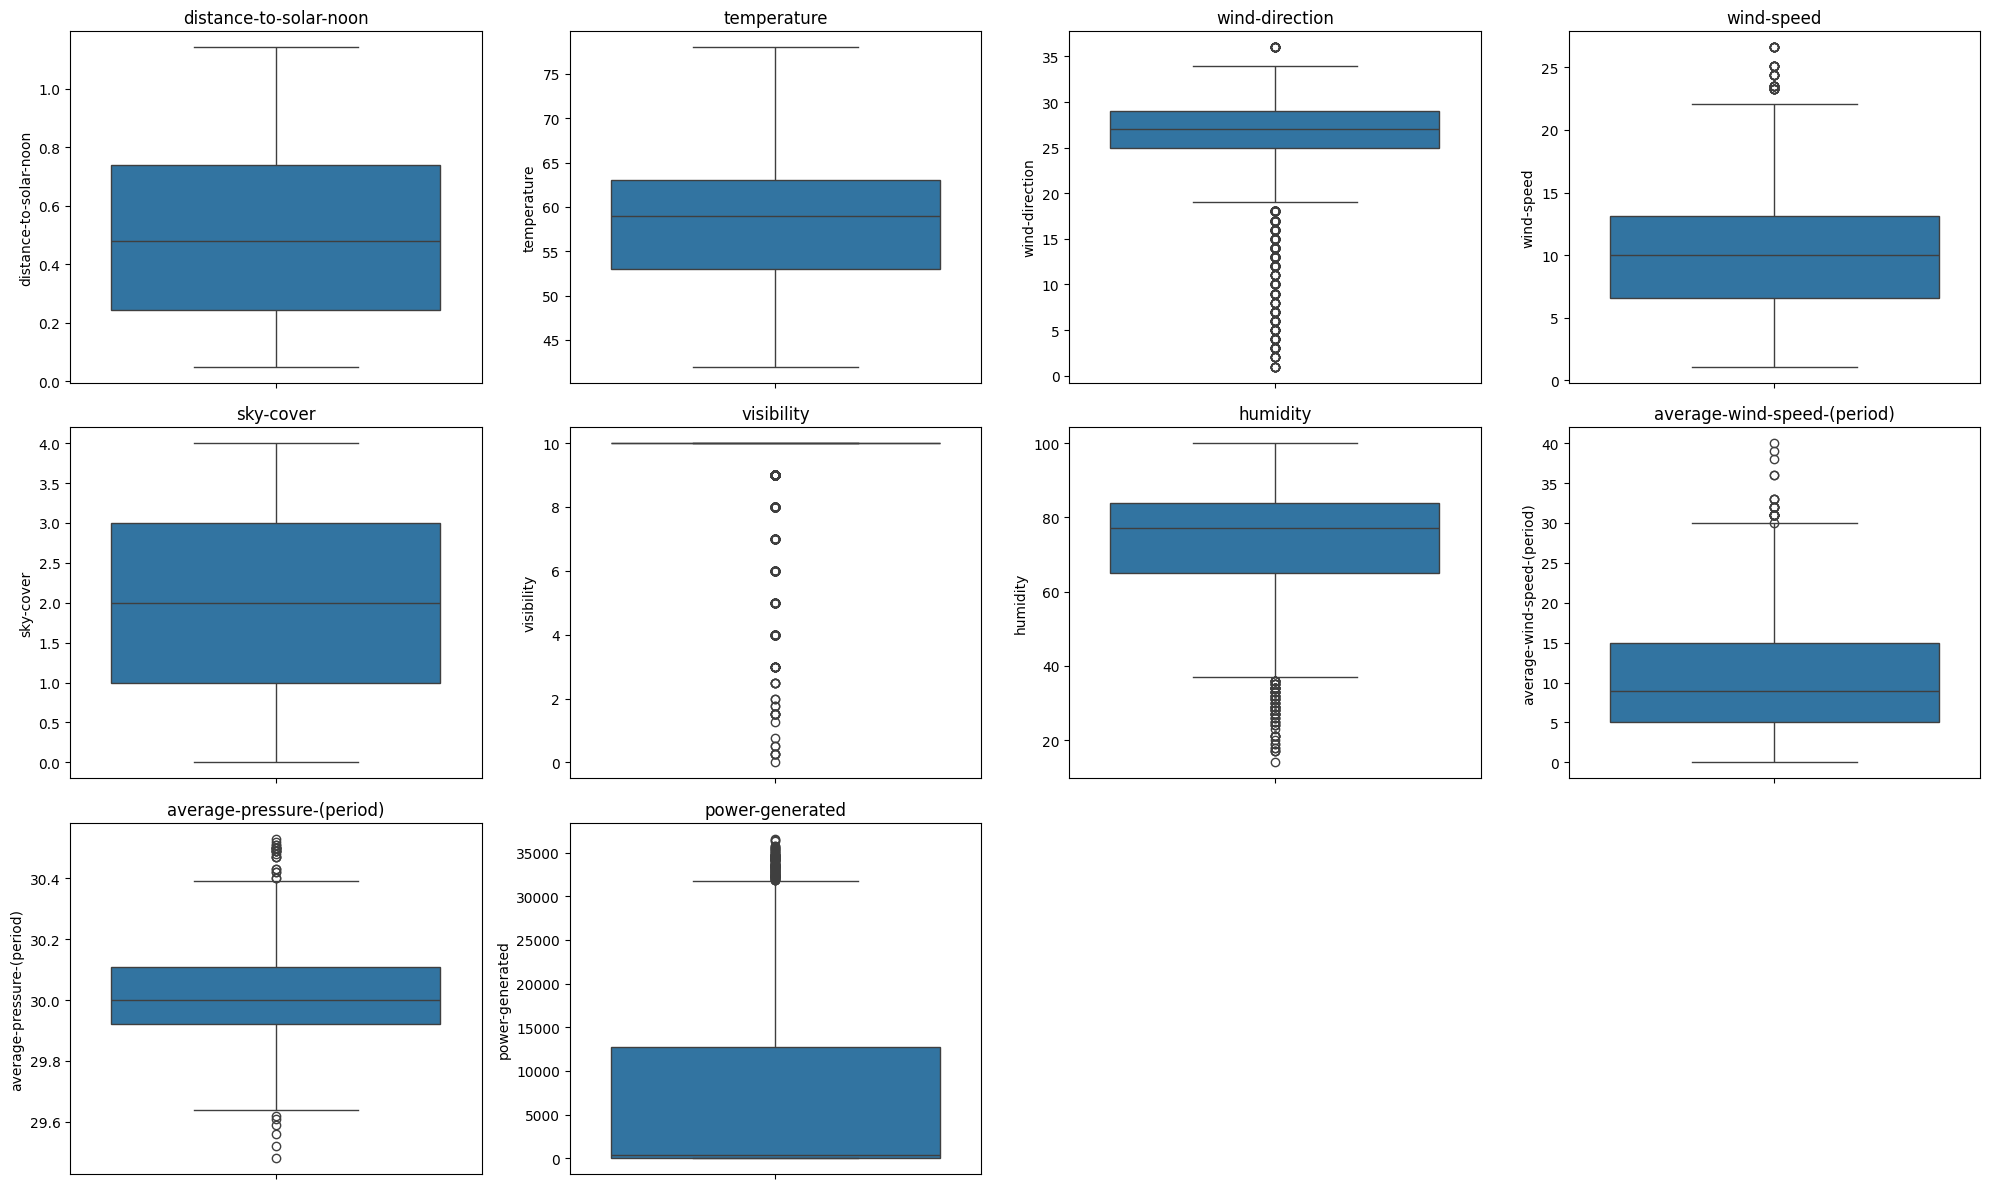

In [ ]:
# Feature vs Target Distribution Plots
plt.figure(figsize=(20,12))
index = 0
for col in df.columns[:10]:
    index += 1
    plt.subplot(3, 4, index)
    sns.boxplot(df[col])
    plt.title(col)
    plt.tight_layout()
plt.show()

In [ ]:
# Let's detect any outliers if we have in any of the numerical columns.

# Function to identify outliers using the capping method
def detect_outliers(column):                                                   #function definition takes columns as input
    Q1 = df[column].quantile(0.25)                                             # defining 25% of the column values
    Q3 = df[column].quantile(0.75)                                             # defiining 75% of the column values
    IQR = Q3 - Q1                                                              # Defining Inter Quartile Range
    lower_bound = Q1 - 1.5 * IQR                                               # Finding lower bound
    upper_bound = Q3 + 1.5 * IQR                                               # Finding upper bound
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]     # identifying outlier i.e data points below lower_bound and data points above upper_bound
    return outliers                                                            # return those points only

# Check for outliers in each column and summarize
outlier_summary = {}                                      # dictionary to hold the number of outlier in each column
for column in df.columns[:10]:                                 # running the loop through all the columns in DataFrame
    outliers = detect_outliers(column)                    # Calling the function
    outlier_summary[column] = len(outliers)               # updating dictionary

# Display the outlier counts for each column
print("Total Number of outliers: ",sum(outlier_summary.values()),"\n")
outlier_summary

Total Number of outliers:  1244 



{'distance-to-solar-noon': 0,
 'temperature': 0,
 'wind-direction': 528,
 'wind-speed': 40,
 'sky-cover': 0,
 'visibility': 429,
 'humidity': 83,
 'average-wind-speed-(period)': 26,
 'average-pressure-(period)': 31,
 'power-generated': 107}

In [ ]:
def remove_outliers(df, columns):                        #function to remove outliers
    df_filtered = df.copy()                              # saving a copy
    for col in columns:                                  #running the loop for all the columns
        Q1 = df[col].quantile(0.25)                      #defining Q1
        Q3 = df[col].quantile(0.75)                      # defining Q3
        IQR = Q3 - Q1                                    #getting IQR
        lower_bound = Q1 - 1.5 * IQR                     # defining the lower bound
        upper_bound = Q3 + 1.5 * IQR                     #defining the upper bound
        df_filtered = df_filtered[(df_filtered[col] >= lower_bound) & (df_filtered[col] <= upper_bound)]  # Keep rows within bounds

    return df_filtered

print("Dataset size before removing outliers:", df.shape)
df = remove_outliers(df, df.columns[:10])                           # Pass all numeric columns at once
print("Dataset size after removing outliers:", df.shape)

Dataset size before removing outliers: (2920, 14)
Dataset size after removing outliers: (1891, 14)


In [ ]:
df.columns